In [1]:
import matplotlib
matplotlib.use('Agg')
from matplotlib import animation
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from scipy import interpolate

%matplotlib inline

In [2]:
from simpy import *

In [68]:
files_ = get_files_in_traverse_dir('/home/vrastil/Documents/GIT/Adhesion-Approximation/output/test_runs/test_pp_run/', '*.dat')
files_

[('/home/vrastil/Documents/GIT/Adhesion-Approximation/output/test_runs/test_pp_run/data_rs_2.900000.dat',
  ''),
 ('/home/vrastil/Documents/GIT/Adhesion-Approximation/output/test_runs/test_pp_run/data_rs_1.500000.dat',
  ''),
 ('/home/vrastil/Documents/GIT/Adhesion-Approximation/output/test_runs/test_pp_run/data_rs_0.700000.dat',
  ''),
 ('/home/vrastil/Documents/GIT/Adhesion-Approximation/output/test_runs/test_pp_run/data_rs_0.300000.dat',
  '')]

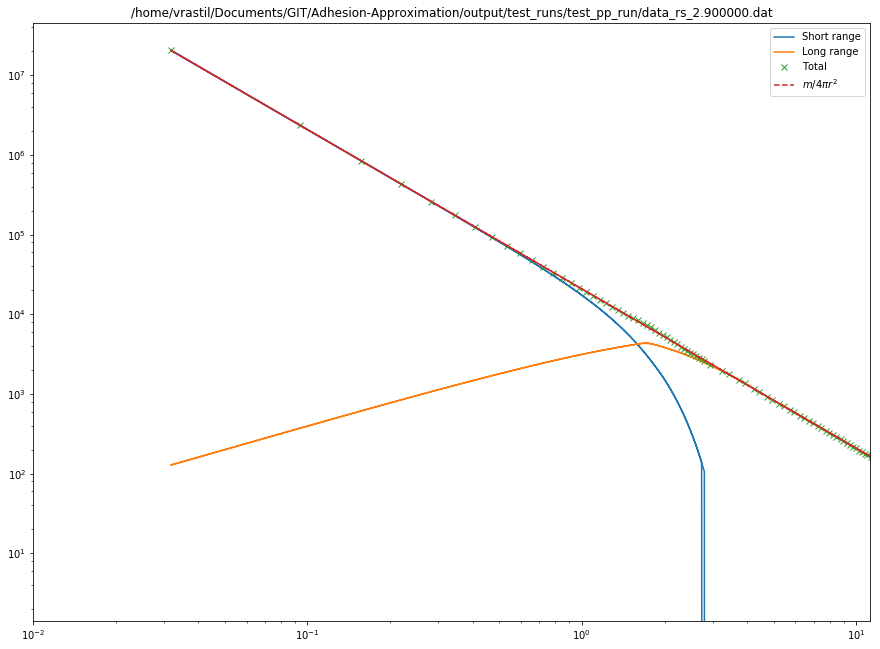

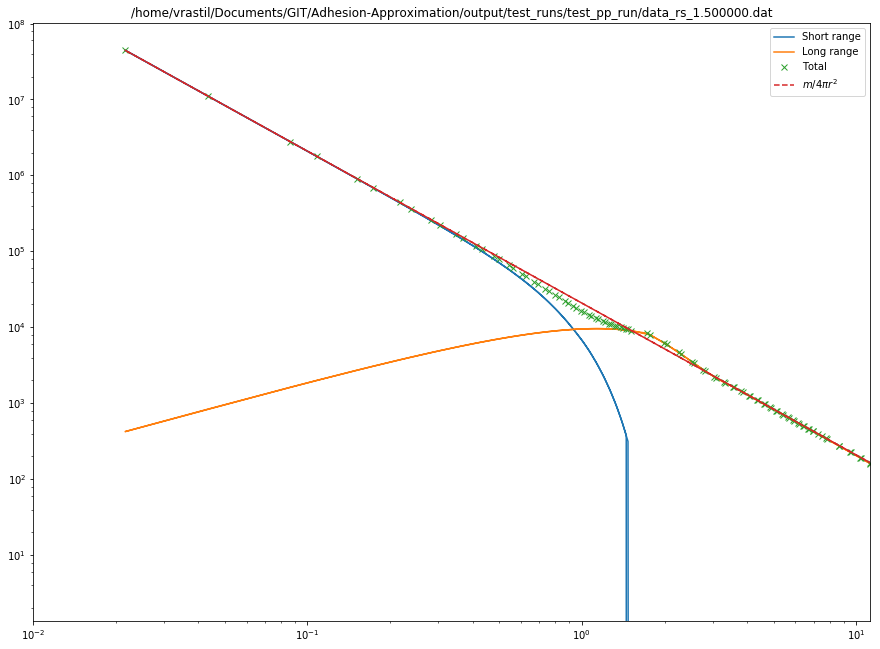

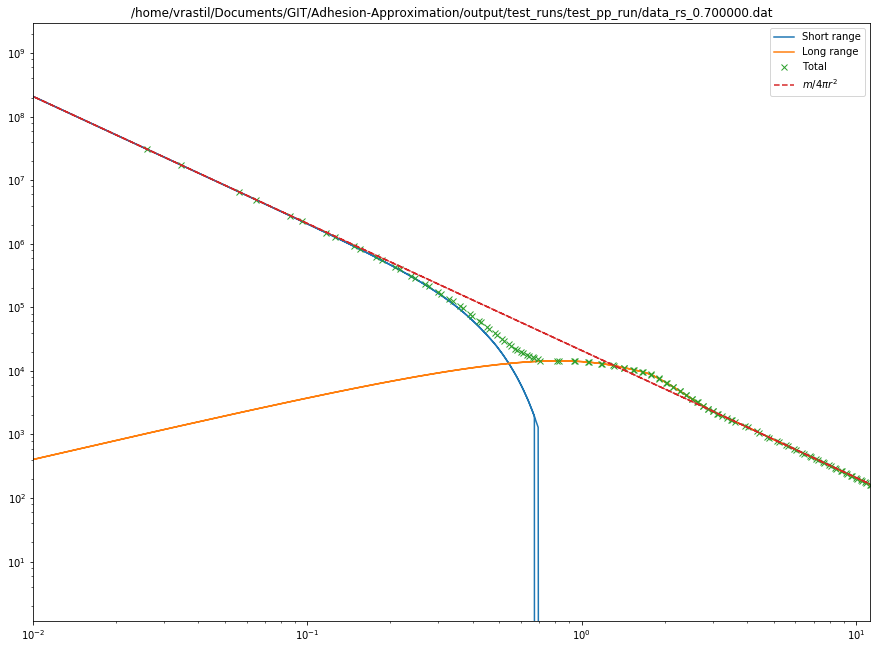

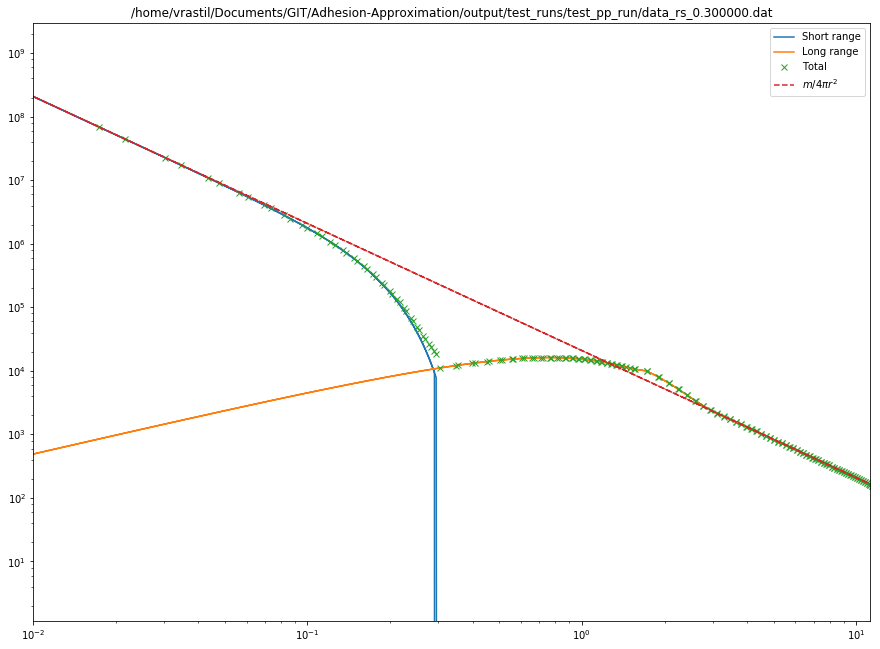

In [69]:
for a_file in files_:
    r, s, l, t, t_form = np.loadtxt(a_file[0], unpack=True)
    fig = plt.figure(figsize=(15, 11))
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim(xmin=1e-2)
    
    plt.title(a_file[0])
    plt.plot(r, s, label='Short range')
    plt.plot(r, l, label='Long range')
    plt.plot(r, t, 'x', label='Total')
    plt.plot(r, t_form, '--', label=r'$m/4\pi r^2$')

    plt.legend()

In [57]:
r = 0.662509
a = 0.952381
z = 2 * r / a
print z

1.39126883044


In [64]:
def ref(z):
    if (z > 2):
        return 1 / (r*r)
    elif (z > 1):
        return (12 / (z*z) - 224 + 896 * z - 840 * z*z + 224 * pow(z, 3) + 70 * pow(z, 4) - 48 * pow(z, 5) + 7 * pow(z, 6)) / (35 * a*a)
    else:
        return (224 * z - 224 * pow(z, 3) + 70 * pow(z, 4) + 48 * pow(z, 5) - 21 * pow(z, 7)) / (35 * a*a)

In [65]:
1/r**2 - ref(z)

0.1079316283635201